In [113]:
!pip install pm4py==2.3.0 #crashing on higher versions.

In [114]:
import pandas as pd
import pm4py
from pm4py.visualization.petri_net import visualizer

In [115]:
class QuestionProcess():
    def __init__(self, path_raw: str, activity_key: str='activity_file', case_id: str='case_id'):
        self.df = pd.read_csv(path_raw, sep=',')
        self.df['relative_timestamp'] = pd.to_datetime(self.df['relative_timestamp'], unit='s') # intToTimestamp
        self.df = pm4py.format_dataframe(self.df, case_id=case_id, activity_key=activity_key, timestamp_key='relative_timestamp')
        self.event_log = pm4py.convert_to_event_log(self.df)
        self.__init_vals()

    def dfg_get(self):
        dfg, start_activities, end_activities = pm4py.discover_dfg(self.event_log)
        pm4py.view_dfg(dfg, start_activities, end_activities)

        # return dfg, start_activities, end_activities

    def __init_vals(self):
        self.net, self.initial_marking, self.final_marking = pm4py.discover_petri_net_alpha(self.event_log)


    def process_tree(self):
        tree = pm4py.convert_to_process_tree(self.net, self.initial_marking, self.final_marking)
        pm4py.view_process_tree(tree, format='png')

        # return self.net, self.initial_marking, self.final_marking, tree

    def alpha(self):
        viz_alpha = visualizer.apply(self.net, self.initial_marking, self.final_marking)
        visualizer.view(viz_alpha)

# **Q2**

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/alf3ratz/process-mining_data/main/data/Q2_data_filtered.csv', sep=',')
df['relative_timestamp'] = pd.to_datetime(df['relative_timestamp'], unit='s') # intToTimestamp

In [117]:
df = pm4py.format_dataframe(df, case_id='case_id', activity_key='activity_file', timestamp_key='relative_timestamp')
event_log = pm4py.convert_to_event_log(df)

<ipython-input-117-f3e5cabf33d6>:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  df = pm4py.format_dataframe(df, case_id='case_id', activity_key='activity_file', timestamp_key='relative_timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


<ipython-input-118-ca7feb766b97>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)


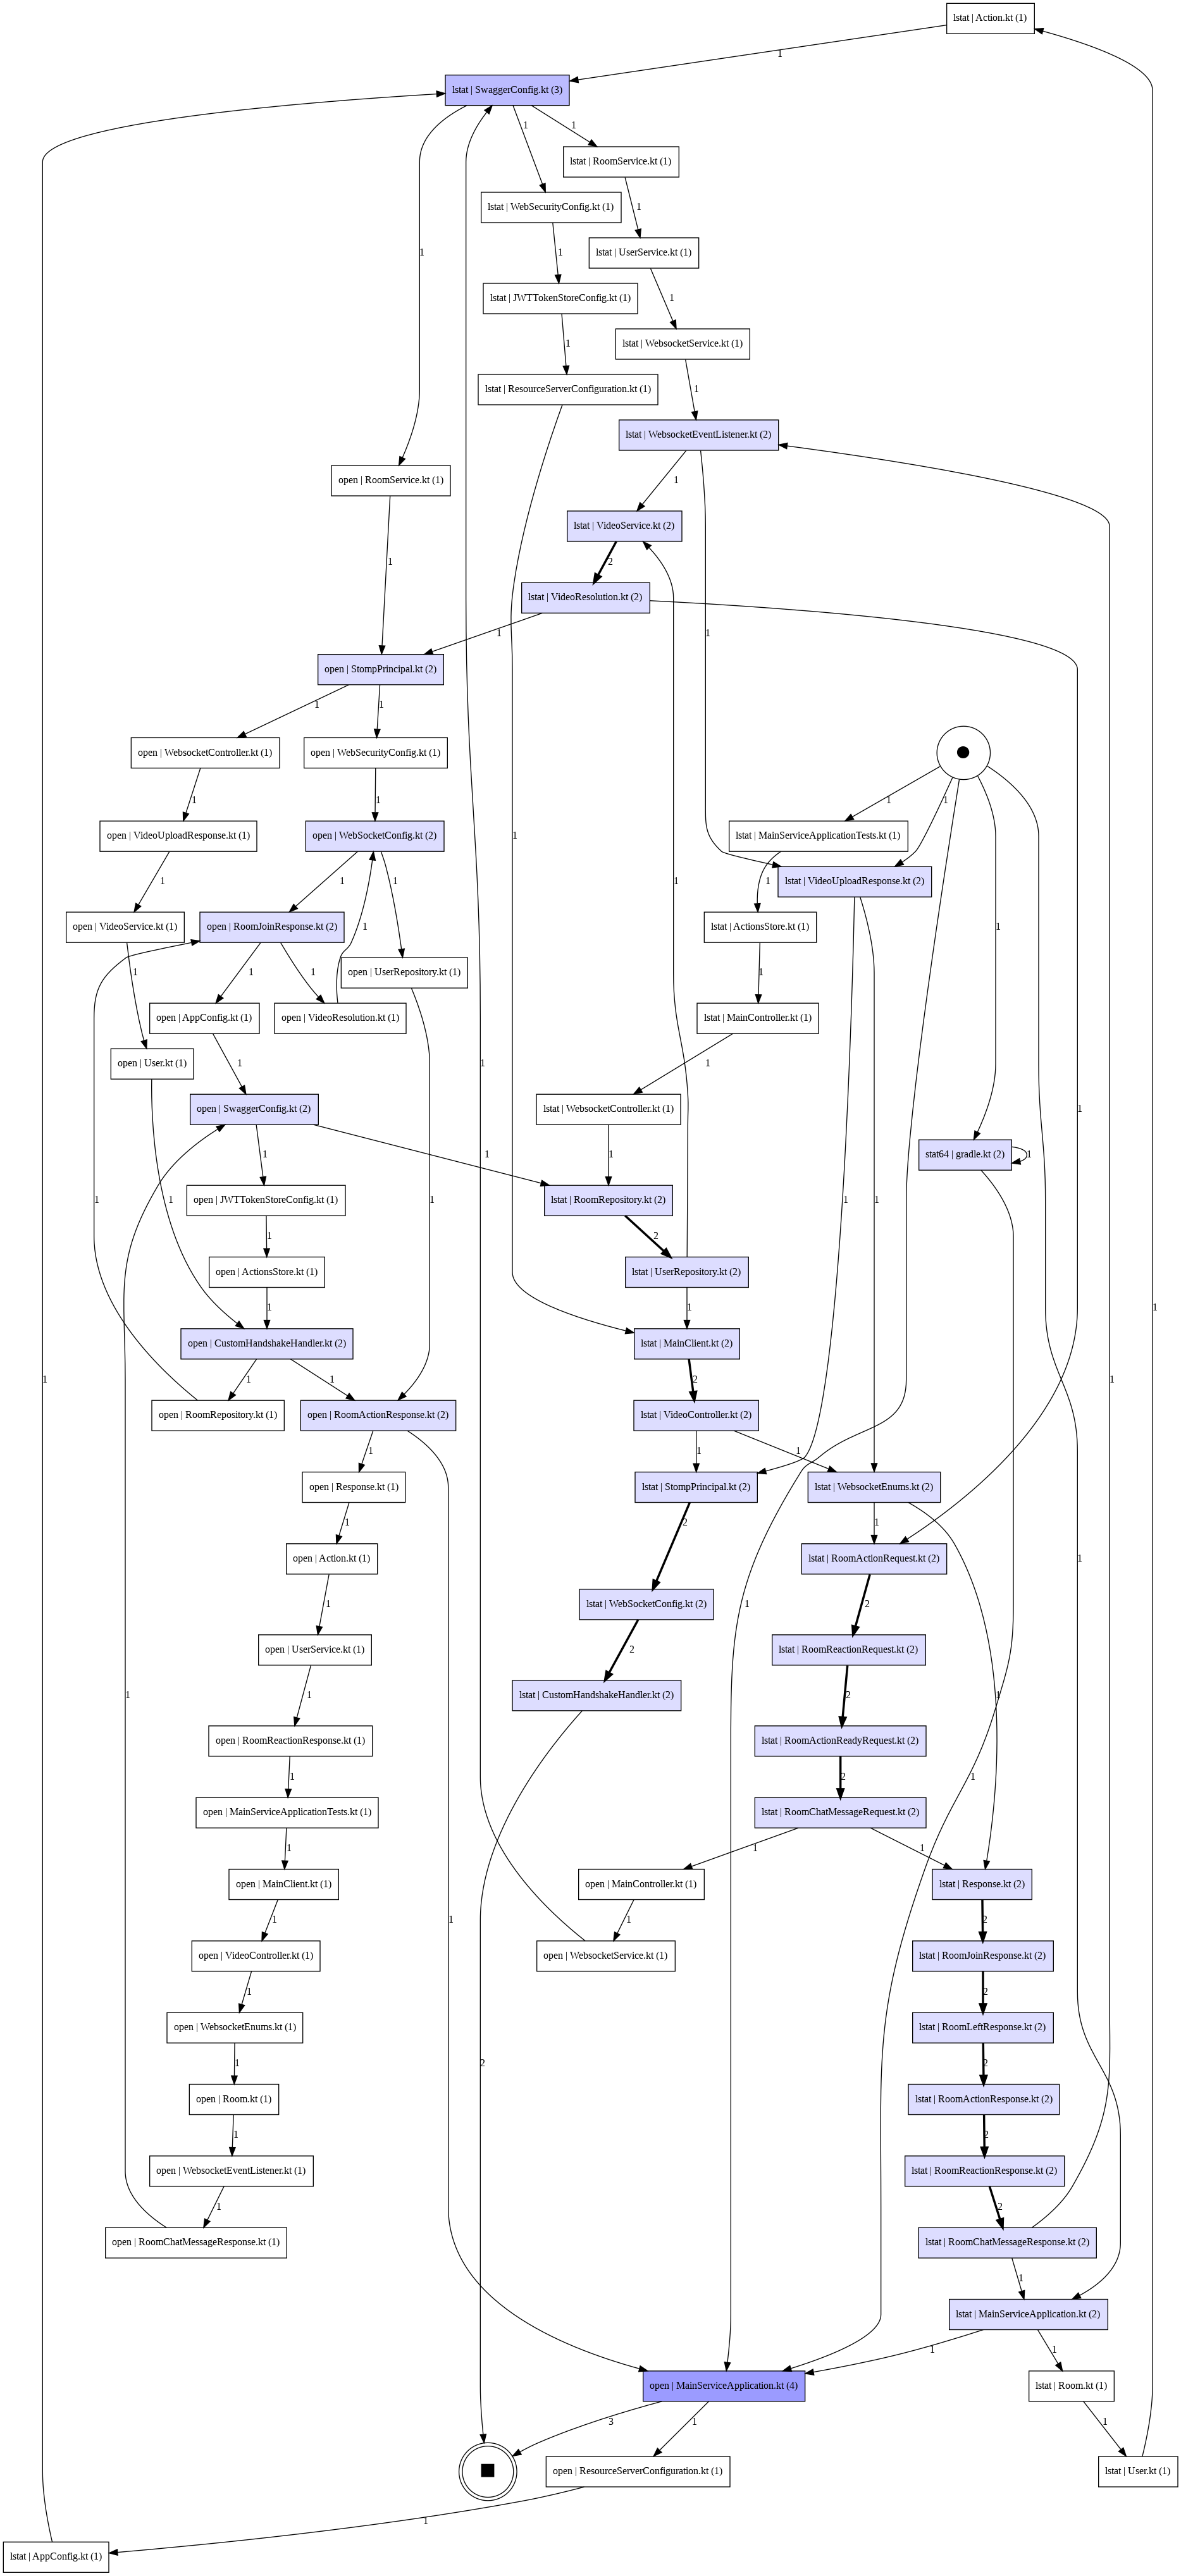

In [118]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [119]:
q2_p = QuestionProcess("https://raw.githubusercontent.com/alf3ratz/process-mining_data/main/data/Q2_data_filtered.csv")

<ipython-input-115-782424d21e2e>:5: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  self.df = pm4py.format_dataframe(self.df, case_id=case_id, activity_key=activity_key, timestamp_key='relative_timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


<ipython-input-115-782424d21e2e>:10: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(self.event_log)


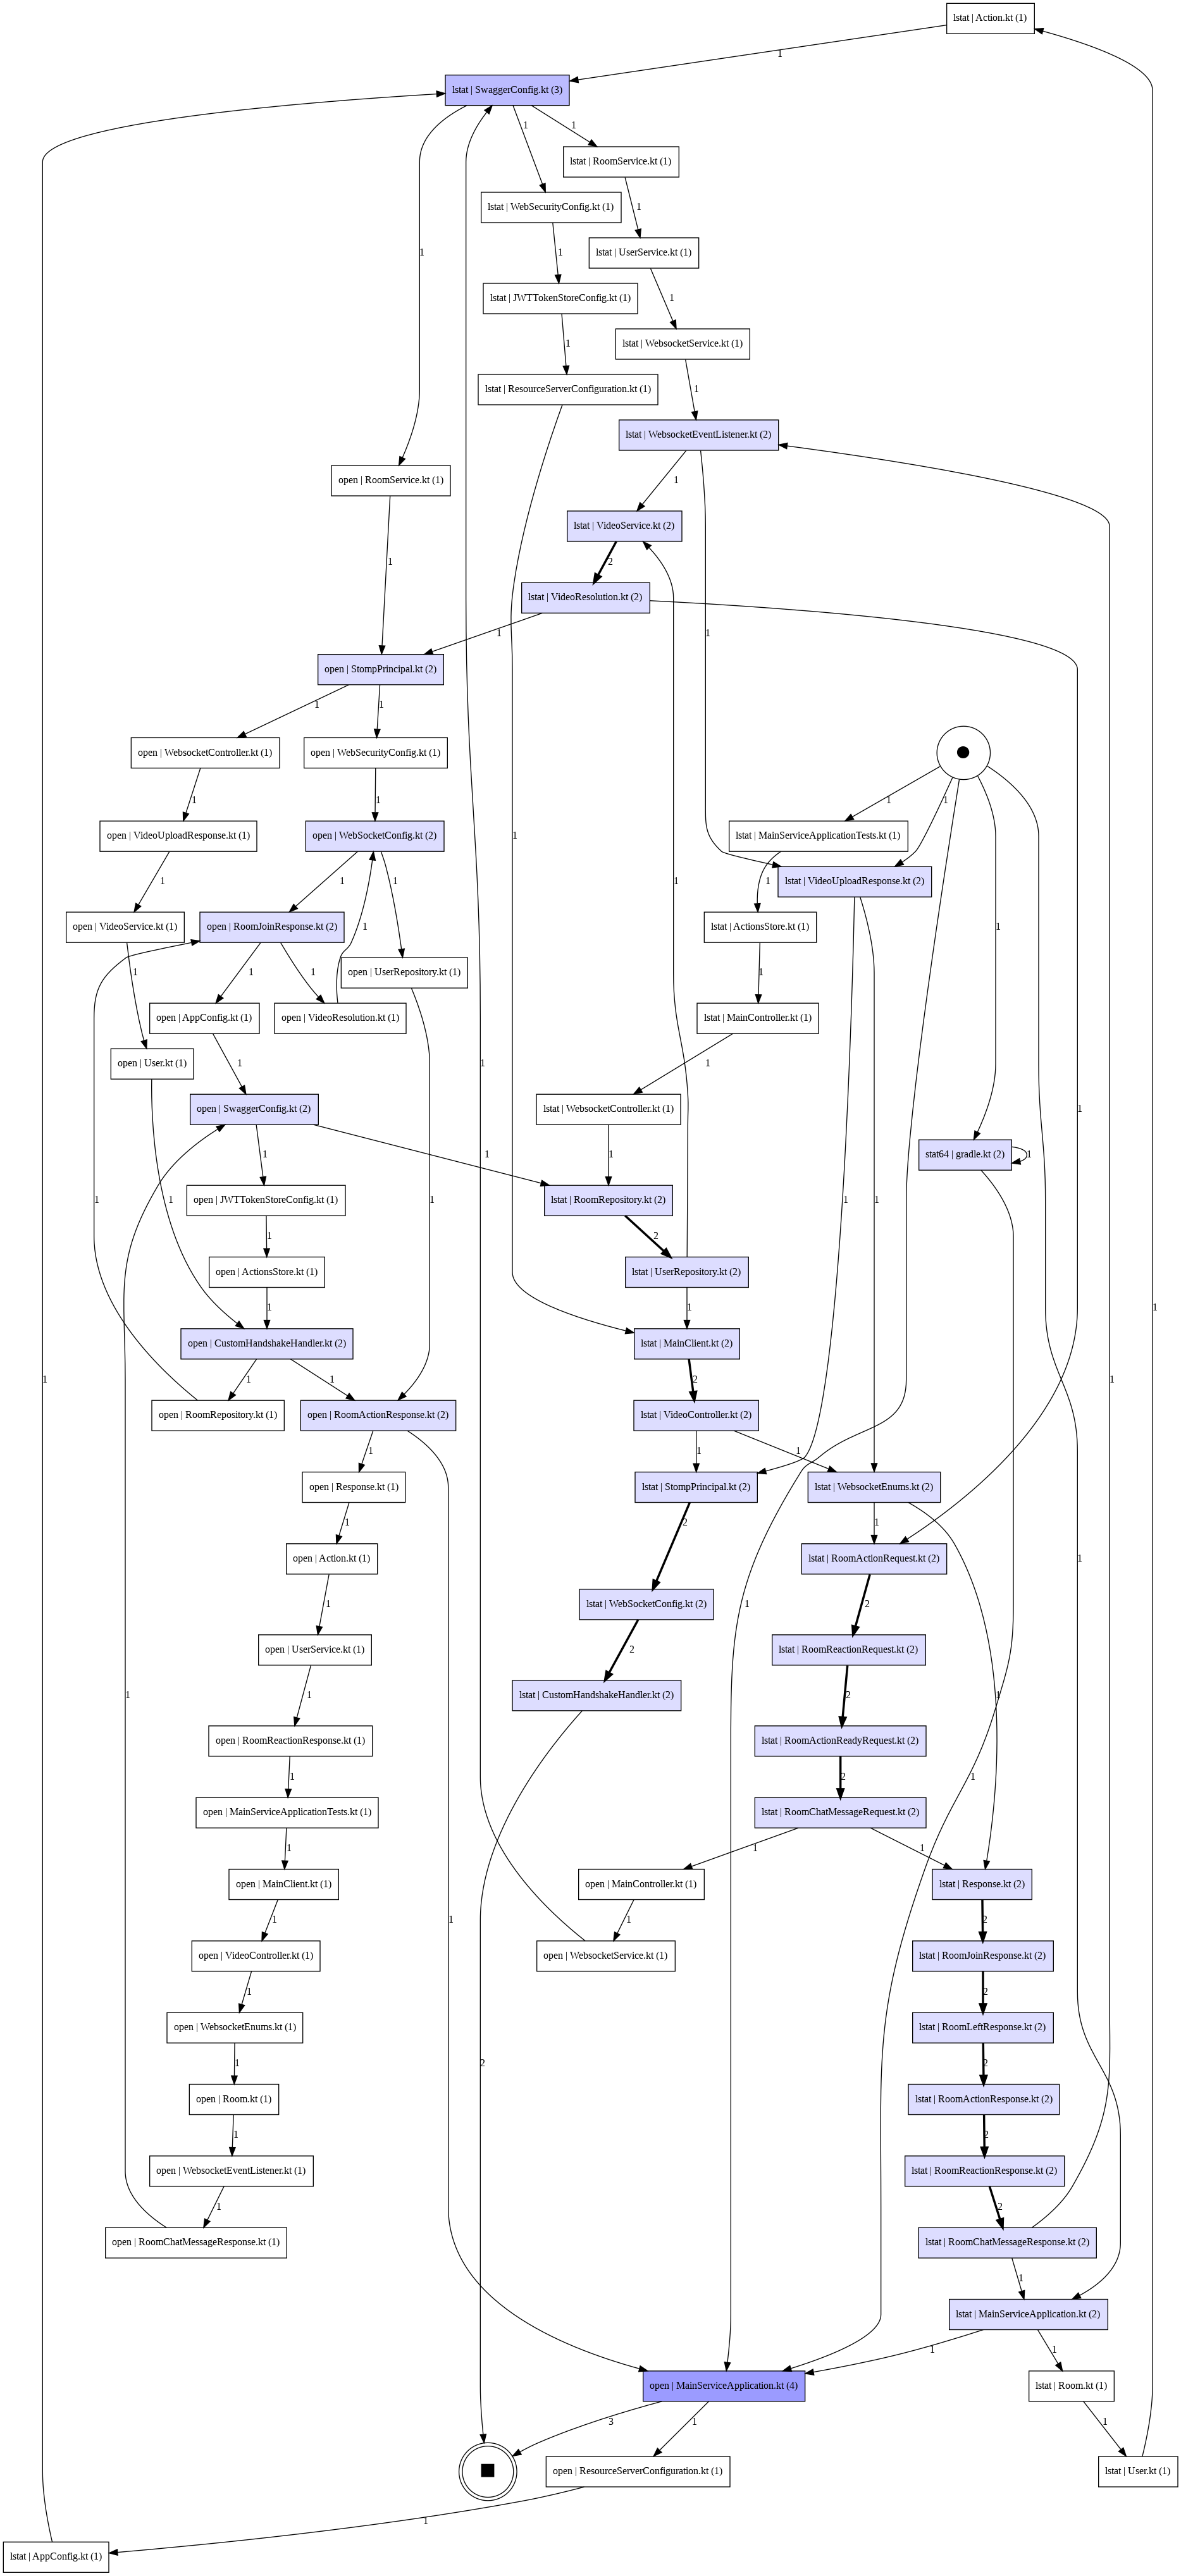

In [120]:
q2_p.dfg_get()

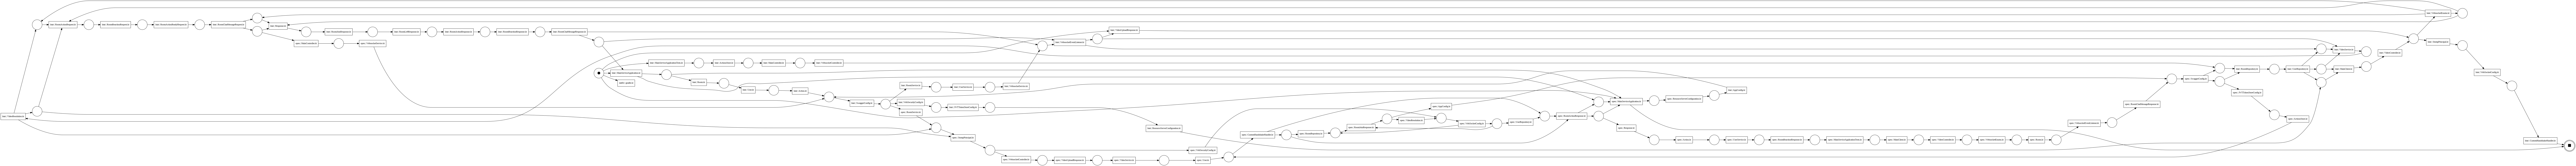

In [121]:
q2_p.alpha()

# **Q5**

In [122]:
q5_p = QuestionProcess("https://raw.githubusercontent.com/alf3ratz/process-mining_data/main/data/Q5_data_filtered.csv")

<ipython-input-115-782424d21e2e>:5: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  self.df = pm4py.format_dataframe(self.df, case_id=case_id, activity_key=activity_key, timestamp_key='relative_timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


<ipython-input-115-782424d21e2e>:10: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(self.event_log)


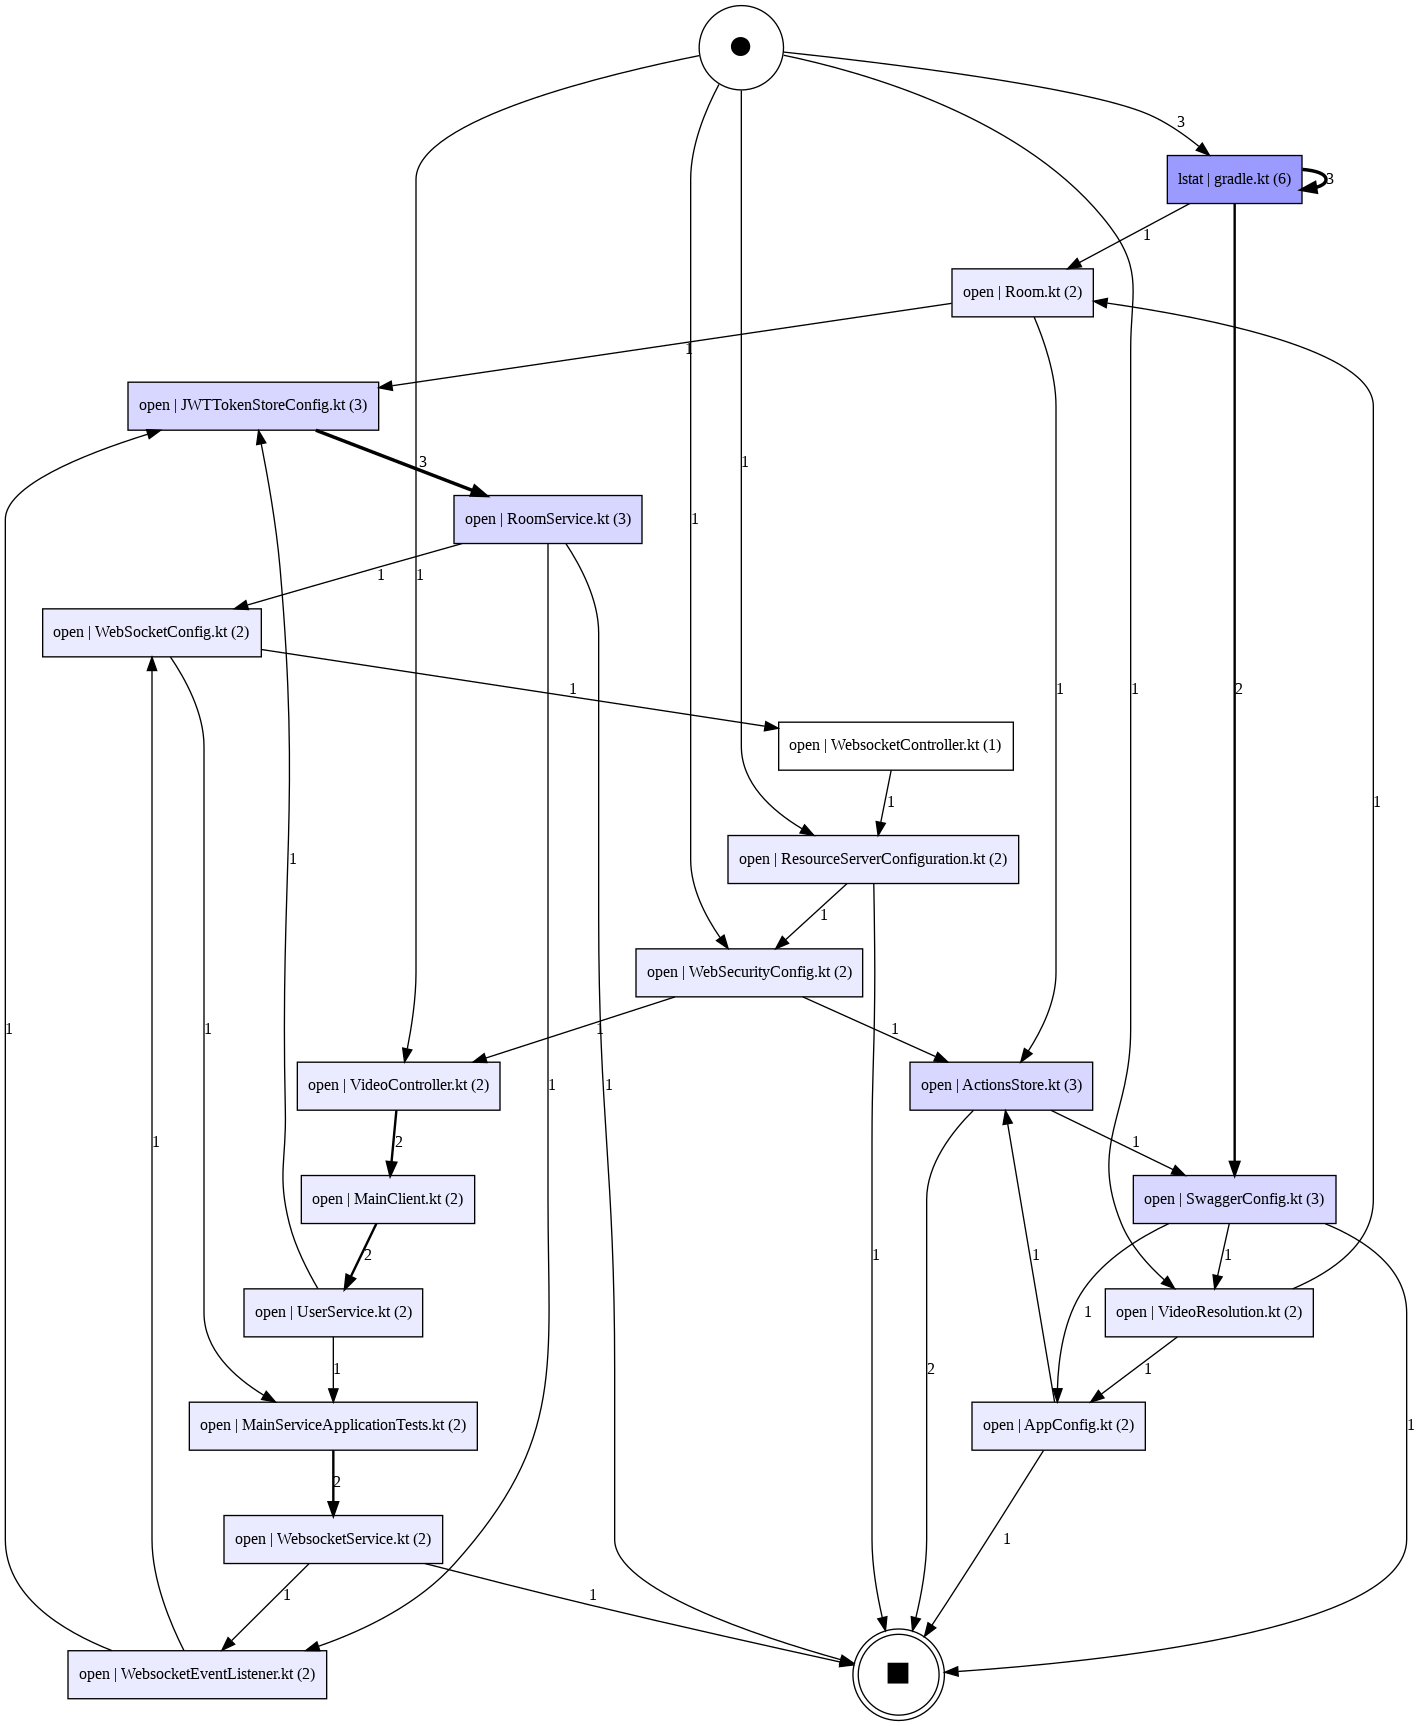

In [123]:
q5_p.dfg_get()

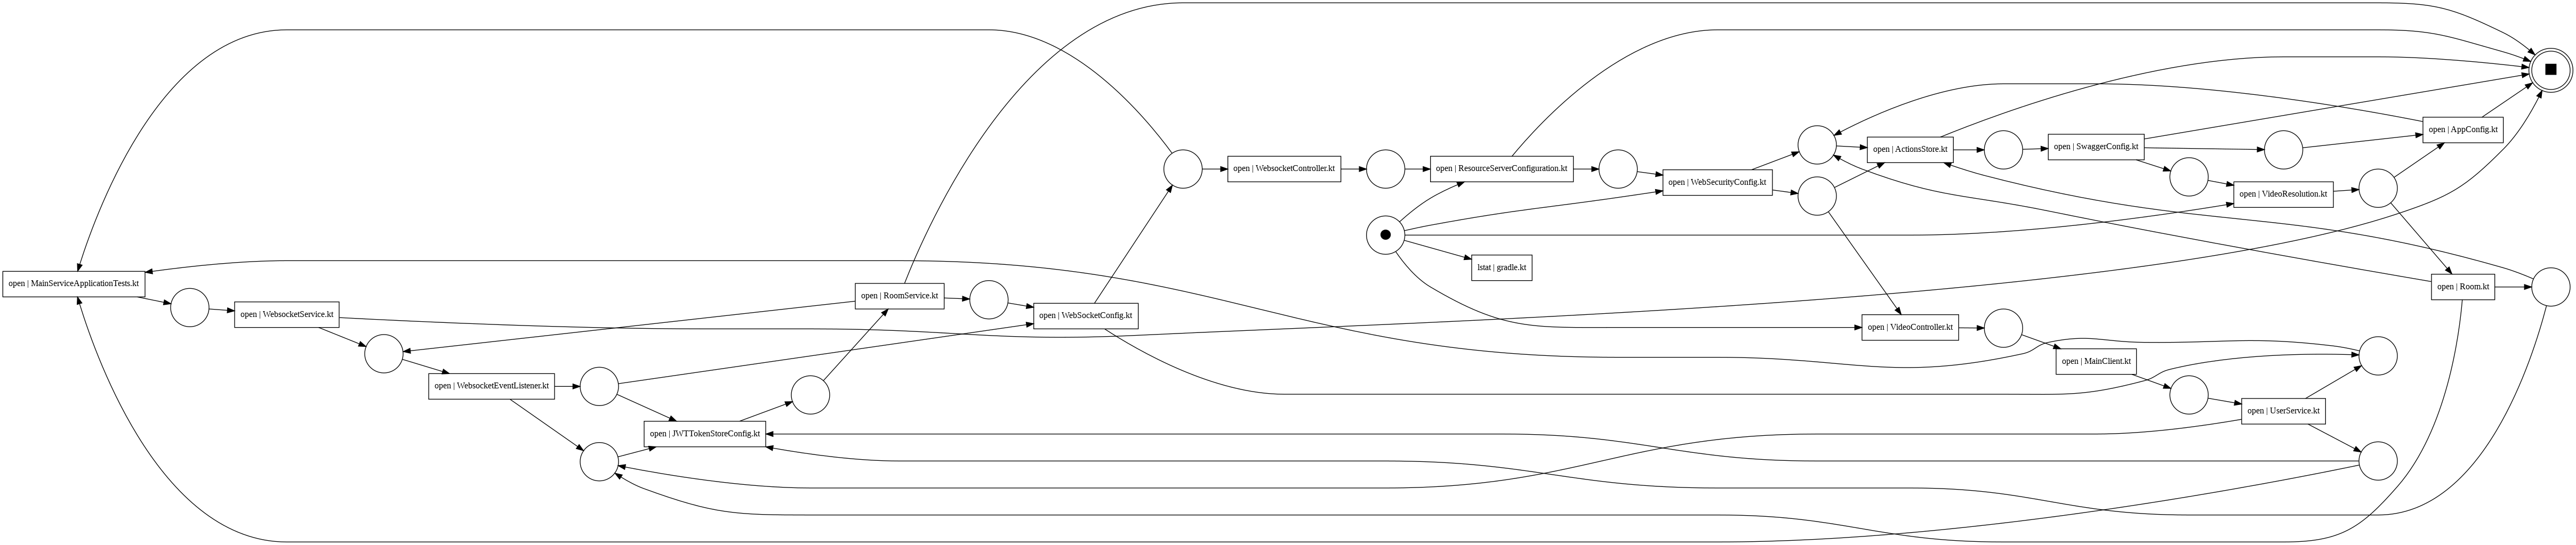

In [124]:
q5_p.alpha()

# **Q6**

In [125]:
df = pd.read_csv('Q6_data_filtered.csv', sep=',')
df = df.rename(columns={'Unnamed: 0': 'case:Unnamed: 0'}) #make it as case (immutable during the process)
df['relative_timestamp'] = pd.to_datetime(df['relative_timestamp'], unit='s') # intToTimestamp

In [126]:
df = pm4py.format_dataframe(df, case_id='case:Unnamed: 0', activity_key='operation', timestamp_key='relative_timestamp')
event_log = pm4py.convert_to_event_log(df)

<ipython-input-126-84be97924506>:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  df = pm4py.format_dataframe(df, case_id='case:Unnamed: 0', activity_key='operation', timestamp_key='relative_timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [127]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)

<ipython-input-127-751130eaa32e>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)


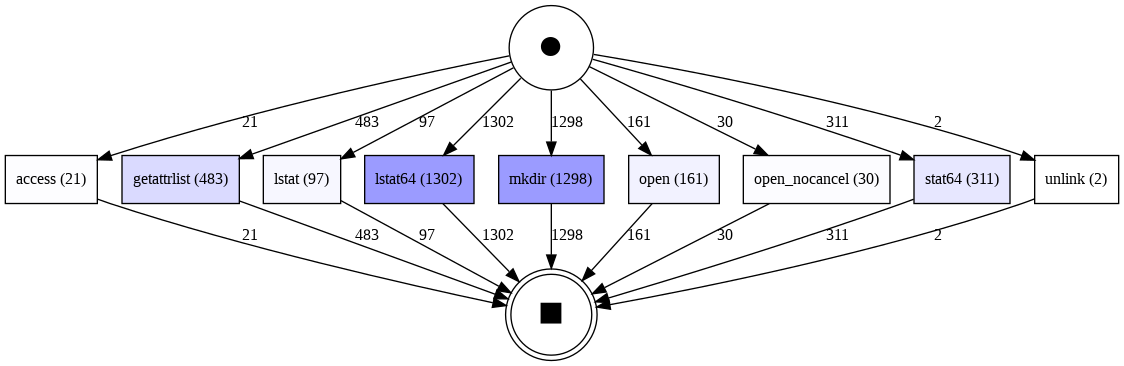

In [128]:
pm4py.view_dfg(dfg, start_activities, end_activities)

In [129]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(event_log)

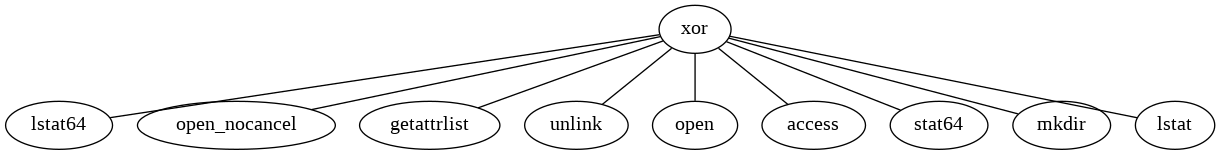

In [130]:
tree = pm4py.convert_to_process_tree(net, initial_marking, final_marking)
pm4py.view_process_tree(tree, format='png')

In [131]:
pm4py.discover_petri_net_alpha(event_log, case_id_key='case:Unnamed: 0', activity_key='operation', timestamp_key='relative_timestamp')

(places: [ end, start ]
 transitions: [ (access, 'access'), (getattrlist, 'getattrlist'), (lstat, 'lstat'), (lstat64, 'lstat64'), (mkdir, 'mkdir'), (open, 'open'), (open_nocancel, 'open_nocancel'), (stat64, 'stat64'), (unlink, 'unlink') ]
 arcs: [ (access, 'access')->end, (getattrlist, 'getattrlist')->end, (lstat, 'lstat')->end, (lstat64, 'lstat64')->end, (mkdir, 'mkdir')->end, (open, 'open')->end, (open_nocancel, 'open_nocancel')->end, (stat64, 'stat64')->end, (unlink, 'unlink')->end, start->(access, 'access'), start->(getattrlist, 'getattrlist'), start->(lstat, 'lstat'), start->(lstat64, 'lstat64'), start->(mkdir, 'mkdir'), start->(open, 'open'), start->(open_nocancel, 'open_nocancel'), start->(stat64, 'stat64'), start->(unlink, 'unlink') ],
 ['start:1'],
 ['end:1'])

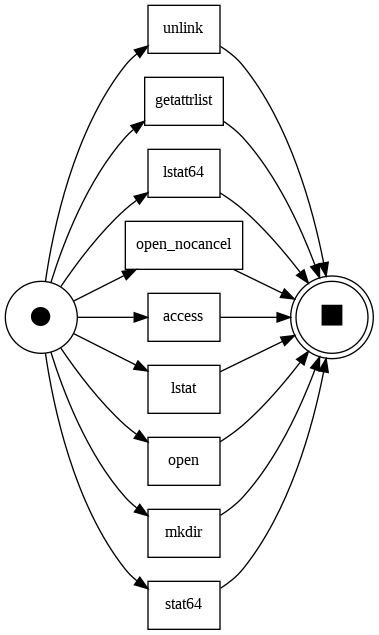

In [132]:
viz_alpha = visualizer.apply(net, initial_marking, final_marking)
visualizer.view(viz_alpha)